## 梯度下降算法
### 目标：迭代函数的最低点 or loss函数的0点时的wight参数值
- 深度学习通过梯度下降算法求解很复杂函数
- 深度学习核心就是梯度下降
- 通过梯度下降求loss函数的极值
- $x^{'} = x- lr*\Delta x$
- $\Delta x = f^{'}(x)$ 该点的倒数值
- lr:学习率，要注意步长 （0.001以3倍变化）


### 梯度下降求解器：
- $x^{'}$不只通过上述公式更新，再考虑前进方向要不要和上一次迭代保持一致，加入等等约束得到不同的梯度下降求解器
- sgd
- momentum
- nag
- adagrad 
- adadelta
- rmsprop

####  $y^*=w*x+b+ \epsilon $
- 加入高斯噪声提高泛化能力

#### $loss=f(W,b)=(WX+b -y)^2$
- ${loss}^{'}(W)=f^{'}(W)=2X(WX+b-y)$
- ${loss}^{'}(b)=f^{'}(b)=2(WX+b-y)$
- 通过梯度下降求得loss函数的最小值
- 使（预测值）$WX+b \approx y$（真实值）



## Linear Regression
- 线性函数，预测线性问题，$y$取值是连续的
### Logistic Regression
- 在linear regression基础上加了激活函数（压缩函数）
- 将$y$区间从无穷压缩到0-1
- 转换为概率问题
### Classification

### Linear regression求解过程——求出loss函数最接近0时的W和b
1. 随机初始化$W$和 $ b $ 的值
2. 将数据中已知的特征$X$和标签$y$和初始化的$b$的值代入$loss^{'}（W）$求得$W^{'}$
3. 将数据中已知的特征$X$和标签$y$和初始化的$W$的值代入$loss^{'}（b）$求得$b^{'}$
- 注意一定要$W$和$b$一起更新，不能求出$W^{'}$后直接代入求$b^{'}$，而必须用上次的$W$去求
- 这样才能求得真实的迭代方向的值
4. 第一次迭代结果:$W^1=W+W^{'},b^1=b+b^{'}$
- 每次迭代计算偏差方便观察$loss = (X+b-y)^2$
5. 将$W^1,b^1$和数据中的特征$X$和标签$y$作为已知代入$loss^{'}（W）$，$loss^{'}（b）$继续迭代第二次

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch 

- 计算loss函数

In [3]:
def loss (w, b, data_array):
    loss = 0
    for i in range(len(data_array)):
        loss += (w * data_array[i, 0] + b - data_array[i, 1]) ** 2
    return loss / float(len(data_array))
#loss (w, b, data_array)

- 将x和y代入 $loss^{'}(w)=2x(wx+b-y)$和$loss^{'}(b)=2(wx+b-y)$
- $w^1=w+lr*loss^{'}(w),b^1=b+lr*loss^{'}(b)$

In [23]:
def gradient (w, b, data_array, lr, batch):
    gradient_w = 0
    gradient_b = 0
    for i in range(batch):
        gradient_w += 2 / batch * data_array[i, 0] * (w*data_array[i, 0] + b - data_array[i, 1])
        gradient_b += 2 / batch * (w * data_array[i, 0] + b - data_array[i, 1])
        #print(gradient_b)
    w -= lr * gradient_w
    b -= lr * gradient_b
    return w, b
#gradient (w, b, data_array, lr, batch)

- 生成随机数据

In [68]:
x = np.random.normal(0,2,1000)
y = x * 3 + 3 + np.random.normal(0,3,1000)
data = [x, y]
data_array = np.array(data).T
#print(data_array.shape)
#plt.scatter(x, y)
#plt.show()

$loss = (wx+b-y)^2$
- 随机生成初始化的w和b

In [69]:
w = np.random.normal(0,1,1)
b = np.random.normal(0,1,1)

In [72]:
i = 0
lr = 0.009
batch = 1000

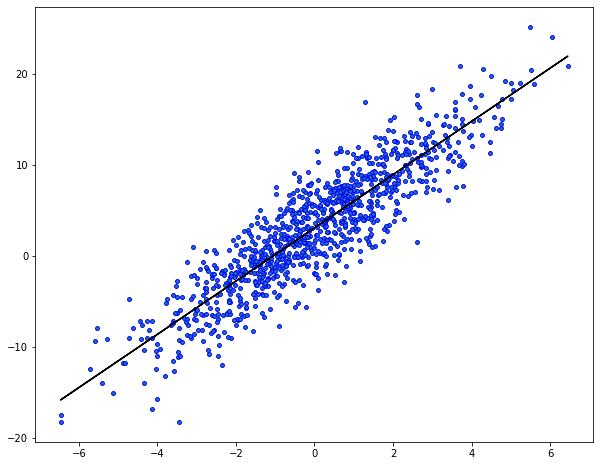

In [73]:
while i < 1000 :
    #print(loss (w, b, data_array))
    np.random.shuffle(data_array)
    w, b = gradient(w, b, data_array, lr, batch)
    #print(w,b)
    i += 1
y1 = w * x + b
plt.figure(figsize=(10,8))
plt.scatter(x, y, label = 'orginal', s = 15, edgecolors = 'b')
plt.plot(x, y1, c = 'black')

## 手写数字问题

- $pred = W_3 *  \{ W_2[W_1X+b_1]+b_2\}+b_3$
- $H_1=W_1X+b_1$
- $H_2=W_2H_1+b_2$
- $H_3=W_3H_2+b_3$

### 激活函数sigmoid
给线性模型添加非线性部分

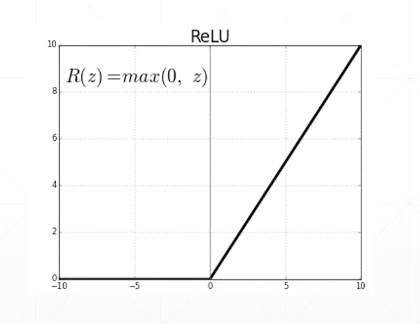

- 在原来的模型上增加激活函数ReLU
- $H_1=relu(XW_1+b_1)$
- $H_2=relu(H_1W_2+b_2)$
- $H_3=relu(H_2W_3+b_3)$